# Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation
Chao-Chung, Liu 9067679

## Dataset

Scikit-Learn Diabetes dataset. Scikit-Learn provides toy datasets (list). Here we will use the diabetes dataset (description). Ensure you review this description before exploring the data.

## Objective

Build a model that can best predict the risk of diabetes progression

This will be used as a screening tool to help physicians identify patients at risk. The models that we look into are:
1. Univariate polynomial regression models
2. Multivariate Polynomial models
3. Decision Trees
4. kNNs
In this lab, we will evaluate the models using R-squared, Mean Absolute Percentage Error (MAPE), and Mean Absolute Error (MAE) metrics. To do that, we will run a train-validation-test split.

## 📢Part 1 Data Preparation and Exploratory Data Analysis (EDA)

1. Get the data.
2. Frame the Problem. Notice that the dependent variable of diabetes progression is "disease progression one year after baseline". Add talking points from the Performance Metrics Classification, K-Nearest Neighbor, and Logistic Regression Classifier workshops for adding substance to this part of the report.
3. EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, scatter plots, histograms, a correlation matrix, and concise and relevant insights (4 point).
4. Clean the data if needed, and explain your reasoning for your reader (1 point)
5. Split the dataset into a train (75%), validation set (10%), and test set (15%).

## ⛤1.Get the Data

First, I use sklearn to get the diabetes data. I use `as_frame=True` ,it is easy to see like a table.

In [153]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data
diabetes = datasets.load_diabetes(as_frame=True)
df = diabetes.frame
print(df.shape)
print(df.info())

(442, 11)
<class 'pandas.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


## ⛤2.Find Problem

* Objective: We want to predict "disease progression one year after baseline". This is a Regression problem because the target is a number, not a category.

* we use $R^2$ and MAE to see how close our "line" is to the data.
    * Even though kNN and Logistic Regression are often for classification,but we can try kNN for regression?
    * Unlike Logistic Regression which predicts probability (0 to 1), our model here predicts a continuous progression score.

## ⛤3.EDA (Exploratory Data Analysis)

In [154]:
# Statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.268604e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


📌Note:
1. I see the features like `BMI`(-9.027530e-02~1.705552e-01) and `BP`(-1.123988e-01~1.320436e-01) are already scaled .
2. The `target` goes from 25 to 346.

which features are correlation with the target?

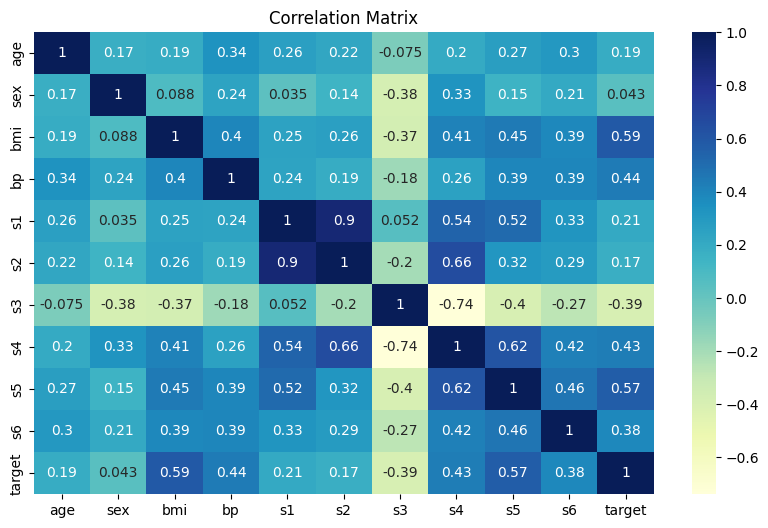

In [155]:
#Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

📌Note:
1. `BMI`(0.59) and `s5`(0.57) have the highest correlation with the `target`. This means BMI is very important for our prediction!
2. `s1` and `s2` highly correlated(0.9).

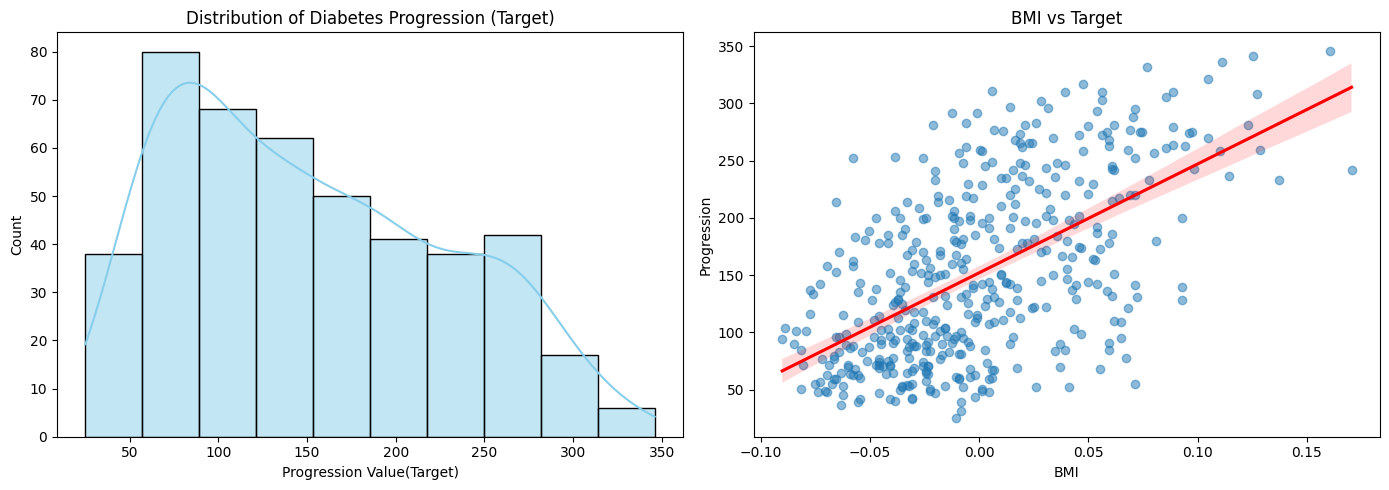

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Histogram of Target
sns.histplot(df['target'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Diabetes Progression (Target)")
axes[0].set_xlabel("Progression Value(Target)")

# Scatter plot: BMI vs Target
sns.regplot(x='bmi', y='target', data=df, ax=axes[1], 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1].set_title("BMI vs Target")
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Progression")

plt.tight_layout()

📌Note:
1. The histogram shows a right-skewed distribution, meaning most patients have lower progression scores, with fewer extreme cases.
2. The scatter plot confirms a positive linear relationship between BMI and diabetes progression. The regression line (red) indicates that as BMI increases, the predicted progression score also tends to rise

## ⛤4. Data Cleaning

### Check for Missing Values (NaN)

In [157]:
# Check for missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

📌Note:

All columns show `0`. There are no missing values.

### Check for Duplicates 

In [158]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

📌Note:

There are `0` duplicates. The data is unique.

### Check Data Types (Formatting)

In [159]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

📌Note:

All columns are float64.

### Outlier Detection

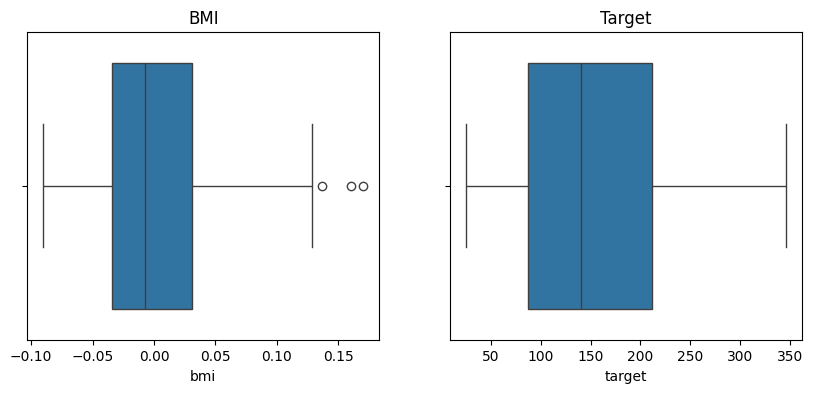

In [160]:
# Boxplot for BMI and Target
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['bmi'])
plt.title("BMI")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['target'])
plt.title("Target")
plt.show()

📌Note:

I see a few dots outside the whiskers for BMI. But because this is a medical dataset, these might be real patients who are very sick. I will keep them for now because they are not impossible numbers.

### 📌Note:

I followed the standard cleaning process: checking for Nulls, Duplicates, and Outliers. I found no missing values and no duplicates. The data is already scaled and centered by Scikit-Learn. Therefore, no rows were deleted, and the data is ready for the Split.

## ⛤5: Split the dataset

train (75%), validation set (10%), and test set (15%)

In [161]:
train_ratio = 0.75
val_ratio = 0.10
test_ratio = 0.15
test_size_from_temp = test_ratio / (val_ratio + test_ratio)

X = df.drop('target', axis=1)
y = df['target']

# train:(validation set + test set)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_ratio), random_state=88)

# Validation and Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size_from_temp, random_state=88)

print(f"Total samples: {len(df)}")
print(f"Train size: {len(X_train)} ({len(X_train)/len(df):.0%})")
print(f"Val size:   {len(X_val)} ({len(X_val)/len(df):.0%})")
print(f"Test size:  {len(X_test)} ({len(X_test)/len(df):.0%})")


Total samples: 442
Train size: 331 (75%)
Val size:   44 (10%)
Test size:  67 (15%)


## 📢Part 2 Univariate Polynomial Regression (BMI)
6. Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models) (1.5 points)
7. Compare the models using the training and validation data. Construct a table to summarize the training validation results. Each model should have a separate row in the table (3 points):
    1. R-Squared
    2. Mean Absolute Error (MAE)
    3. MAPE
8. Identify the best model based on the table above.
9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE) (1 point).
10. Plot a graph of the train, validation, and test data points, and the fit of the chosen model over each of them (1 point).
11. Write down the equation of the best model (with a two-decimal-digit precision, assuming it's sufficient) (1 point).
12. Calculate the expected diabetes progression for a BMI value of your choice using `model.predict()` for that value (0.5 point).
13. How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use the sklearn function `get_feature_names_out()`(1 point)
14. Provide a conclusion section. In particular, conduct a thorough analysis of where the model fails, and include a brief section in the conclusions that describes the model's limitations. This should be in addition to summarizing its performance. Add talking points from the Performance Metrics Classification, K-Nearest Neighbor, and Logistic Regression Classifier workshops. (1 point).

## ⛤6+7.Building 6 Models & Comparing Results

In [162]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

#Prepare data (BMI)
X_train_bmi = X_train[['bmi']]
X_val_bmi = X_val[['bmi']]
X_test_bmi = X_test[['bmi']]

results_list = []
models_dict = {} # To save models for later

for deg in range(6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Metrics for Validation
    r2 = r2_score(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    # Parameters count
    params = X_train_poly.shape[1]
    
    results_list.append({
        "Degree": deg, 
        "R-Squared": round(r2, 4), 
        "MAE": round(mae, 2), 
        "MAPE": round(mape, 4),
        "Parameters": params
    })
    models_dict[deg] = (model, poly)

# Show table
results_df = pd.DataFrame(results_list)
results_df

,Degree,R-Squared,MAE,MAPE,Parameters
0,0,-0.0603,77.95,0.5922,1
1,1,0.4089,59.33,0.4330,2
2,2,0.4038,59.65,0.4351,3
3,3,0.4098,59.13,0.4291,4
4,4,0.4095,59.02,0.4268,5
5,5,0.4184,58.54,0.4242,6


## ⛤8. Identify the Best Model

In [163]:
metrics = {
    "R-Squared": {"col": "R-Squared", "higher_is_better": True},
    "MAE": {"col": "MAE", "higher_is_better": False},
    "MAPE": {"col": "MAPE", "higher_is_better": False}
}

for name, info in metrics.items():
    # R-Squared => descending 
    # MAE/MAPE => ascending 
    sorted_df = results_df.sort_values(by=info['col'], ascending=not info['higher_is_better'])

    rank_list = [f"Degree {int(d)}" for d in sorted_df['Degree']]
    rank_str = " > ".join(rank_list)
    
    status = "(bigger better)" if info['higher_is_better'] else "(smaller better)"
    print(f"{name} : {status}:")
    print(f"{rank_str}\n")
print(results_df)

R-Squared : (bigger better):
Degree 5 > Degree 3 > Degree 4 > Degree 1 > Degree 2 > Degree 0

MAE : (smaller better):
Degree 5 > Degree 4 > Degree 3 > Degree 1 > Degree 2 > Degree 0

MAPE : (smaller better):
Degree 5 > Degree 4 > Degree 3 > Degree 1 > Degree 2 > Degree 0

   Degree  R-Squared    MAE    MAPE  Parameters
0       0    -0.0603  77.95  0.5922           1
1       1     0.4089  59.33  0.4330           2
2       2     0.4038  59.65  0.4351           3
3       3     0.4098  59.13  0.4291           4
4       4     0.4095  59.02  0.4268           5
5       5     0.4184  58.54  0.4242           6


### 📌Note:
1. I look at the metrics, `Degree 5` is the better in numbers ($R^2$ = 0.4184), but `Degree 1` ($R^2$ = 0.4089) is almost the same. The difference is only about 0.01.
2. `Degree` 1 is a simple straight line with only 2 parameters. `Degree 5` is very complex with 6 parameters,high degrees like Degree 5 is Overfitting.
3. I choose `Degree 1` as my best model.

## ⛤9. Run the Chosen Model on Test Set

In [164]:
compare_degrees = [1, 5]
test_comparison = []

for deg in compare_degrees:
    curr_model, curr_poly = models_dict[deg]
    
    X_test_poly = curr_poly.transform(X_test_bmi)
    y_test_pred = curr_model.predict(X_test_poly)
    
    t_r2 = r2_score(y_test, y_test_pred)
    t_mae = mean_absolute_error(y_test, y_test_pred)
    t_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    
    test_comparison.append({
        "Model": f"Degree {deg}",
        "Test R2": round(t_r2, 4),
        "Test MAE": round(t_mae, 2),
        "Test MAPE": round(t_mape, 4)
    })

test_results_df = pd.DataFrame(test_comparison)
test_results_df


,Model,Test R2,Test MAE,Test MAPE
0,Degree 1,0.4280,49.4,0.4654
1,Degree 5,0.4205,49.6,0.4616


### 📌Note:
1. `Degree 1` is the winner on Test $R^2$: My `Degree 1` model has a higher $R^2$ (0.4280) than `Degree 5` (0.4205).
2. The MAE for `Degree 1` (49.4) is lower than `Degree 5` (49.6).
3. Even though `Degree 5` looked better in the Validation set, it became worse on the Test set. This is because Degree 5 is overfitting.

## ⛤10. Plotting the Fit

l:\Foundations of Machine Learning Frameworks\PLab_2_MLRegression_NPModels_CValidation\Plab2venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


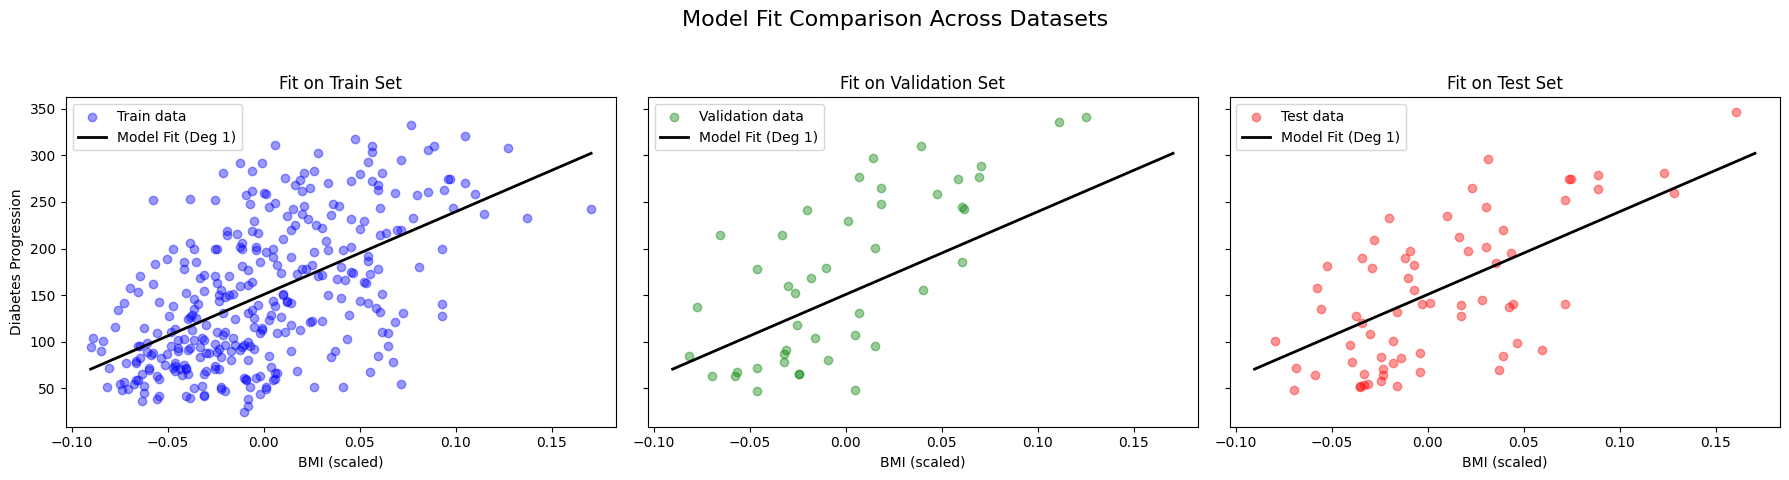

In [165]:
import matplotlib.pyplot as plt

best_deg = 1 
best_model, best_poly = models_dict[best_deg] 

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

datasets_to_plot = [
    (X_train_bmi, y_train, 'blue', 'Train'),
    (X_val_bmi, y_val, 'green', 'Validation'),
    (X_test_bmi, y_test, 'red', 'Test')
]

bmi_line = np.linspace(df['bmi'].min(), df['bmi'].max(), 100).reshape(-1, 1)
bmi_line_poly = best_poly.transform(bmi_line)
y_line_pred = best_model.predict(bmi_line_poly)

for i, (X_data, y_data, color, name) in enumerate(datasets_to_plot):

    axes[i].scatter(X_data, y_data, color=color, alpha=0.4, label=f'{name} data')
    axes[i].plot(bmi_line, y_line_pred, color='black', linewidth=2, label=f'Model Fit (Deg {best_deg})')
    
    axes[i].set_title(f'Fit on {name} Set')
    axes[i].set_xlabel('BMI (scaled)')
    if i == 0:
        axes[i].set_ylabel('Diabetes Progression')
    axes[i].legend()

plt.suptitle("Model Fit Comparison Across Datasets", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## ⛤11. Model Equation

In [166]:
intercept = best_model.intercept_
coef = best_model.coef_
# Degree 1 has [0, coef1] because 0-index is for the constant 1
print(f"y = {intercept:.2f} + {coef[1]:.2f} * x")

y = 150.75 + 886.94 * x


### 📌Note:

The equation of the best model:
#### $y = 150.75 + 886.94x$

## ⛤12. Predict for a custom BMI


I use `model.predict()` for a BMI value of `0.05`.In this dataset, BMI is already scaled to small numbers.

In [167]:
# BMI -9.027530e-02(-0.09) ~ 1.705552e-01(0.17)
patient_BMI=0.05
min_bmi = df['bmi'].min()
max_bmi = df['bmi'].max()

my_bmi = np.array([[patient_BMI]])
my_bmi_poly = best_poly.transform(my_bmi)
prediction = best_model.predict(my_bmi_poly)

print(f"Prediction for BMI {patient_BMI}: {prediction[0]:.2f}")

Prediction for BMI 0.05: 195.10


l:\Foundations of Machine Learning Frameworks\PLab_2_MLRegression_NPModels_CValidation\Plab2venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


l:\Foundations of Machine Learning Frameworks\PLab_2_MLRegression_NPModels_CValidation\Plab2venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


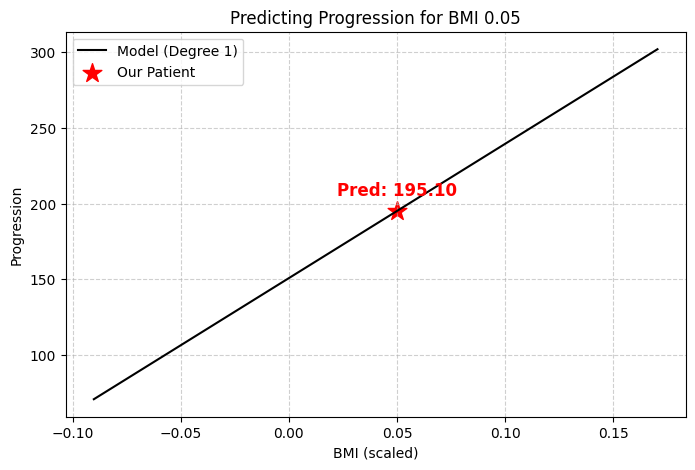

In [168]:
import matplotlib.pyplot as plt

# Create the line for the model
bmi_line = np.linspace(min_bmi, max_bmi, 100).reshape(-1, 1)
bmi_line_poly = best_poly.transform(bmi_line)
y_line_pred = best_model.predict(bmi_line_poly)

plt.figure(figsize=(8, 5))
plt.plot(bmi_line, y_line_pred, color='black', label=f'Model (Degree {best_deg})')
plt.scatter(patient_BMI, prediction, color='red', marker='*', s=200, label='Our Patient')

# Add text to show the value on the plot
plt.text(patient_BMI, prediction[0] + 10, f'Pred: {prediction[0]:.2f}', fontsize=12, fontweight='bold', color='red', ha='center')

plt.title(f"Predicting Progression for BMI {patient_BMI}")
plt.xlabel("BMI (scaled)")
plt.ylabel("Progression")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 📌Note:
1. I chose a scaled BMI value of `0.05`.
2. My model predicts a diabetes progression of `195.10`.
3. `195.10` is the "disease progression one year after baseline." It doesn't have a unit, but higher is worse.
4. The MAE I found earlier (around `49.4-59.3`) means the real value for this patient could be anywhere between `~145` and `~245`.

## ⛤13: Trainable Parameters

In [169]:
param_data = []

for deg in range(6):
    _, poly_transformer = models_dict[deg]

    feature_names = poly_transformer.get_feature_names_out(['bmi'])
    
    param_data.append({
        "Degree": deg,
        "Features": ", ".join(feature_names),
        "Trainable Parameters": len(feature_names)
    })

param_df = pd.DataFrame(param_data)
param_df

,Degree,Features,Trainable Parameters
0,0,1,1
1,1,"1, bmi",2
2,2,"1, bmi, bmi^2",3
3,3,"1, bmi, bmi^2, bmi^3",4
4,4,"1, bmi, bmi^2, bmi^3, bmi^4",5
5,5,"1, bmi, bmi^2, bmi^3, bmi^4, bmi^5",6


### 📌Note:
1. Degree 0 (1 Parameter): The model only has a constant (intercept).
2. Degree 1 (2 Parameters): We have the intercept and bmi.This is a simple linear equation.
3. Degree 2 to 5 :Every time we increase the degree, we add a new "power" of BMI (like $bmi^2$, $bmi^3$, ...)

## ⛤14: Conclusion and Model Analysis

### Performance Summary
In this part, I built 6 polynomial models to predict diabetes progression using only the **BMI** feature. 
* **The Best Model:** I chose **Degree 1** because it is simple and stable.
* On the test set, the $R^2$ was about **0.4280**, and the MAE was **49.4**.
* This means BMI explains about 42% of the disease progression. The model shows a clear **positive trend**: as BMI increases, the progression score also increases.

---

### Where the Model Fails (Analysis)
1. Our MAE is around `49``. If the model predicts 150, the real score could be 100 or 200. This is a big difference for a medical screening tool.
2. Some patients in the scatter plot have **low BMI but high progression**. My model cannot explain this because it only looks at BMI. It "fails" to see other risks like age, blood pressure, or genetics.
3. While Degree 5 had better scores on the validation set, it performed worse on the **Test Set** (Test $R^2$: 0.4205 vs 0.4280). This is **Overfitting**.

---

### Model Limitations

Based on our **Workshops (KNN, Logistic Regression, and Metrics)**, here are the limits:
* In the KNN workshop, we saw that using more "features" helps the model see the big picture. Only using BMI is not incomplete."
* Logistic Regression and Linear Regression often assume a straight-line relationship. However, human health is complex. A straight line `Degree 1` might be too simple (**Underfitting**), but a crazy curve `Degree 5` is too complex.
* Because the MAE is high, this model should only be a **screening tool** (to find people who *might* be at risk), not a final diagnosis tool. It has low precision for specific individuals.

**Final Thought:** To help physicians better, we need to use **all features** (Multivariate) !

## 📢Part 3 Multivariate and Non-Parametric Models

In this part, use all features in the dataset, or drop some features at your discretion based on the EDA.

Repeat the steps in part 2 for the following models:
1. Two polynomial models (degrees >1, of your choice)
2. Two decision trees (e.g., consider changing the `max_depth` hyperparameter)
3. Two kNNs
4. Two Logistic Regression models

Note: Plots of multivariate models are not required (step 10)

## ⛤1: Feature Selection

Based on my EDA in Part 1, I saw that `s1` and `s2` are very "close friends" (0.89 correlation).

This means they have the same information.

However, the instructions say I can use "all features," so I will use all of them to see if the models can handle it!

In [170]:
X_train_all = X_train
X_val_all = X_val
X_test_all = X_test

## ⛤2: Building Models

In [171]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder

p3_results = []

# --- Two Polynomial Models (Multivariate) ---
for deg in [2, 3]:
    poly = PolynomialFeatures(degree=deg)
    X_train_p = poly.fit_transform(X_train_all)
    X_val_p = poly.transform(X_val_all)
    
    m = LinearRegression().fit(X_train_p, y_train)
    y_pred = m.predict(X_val_p)
    p3_results.append({"Model": f"Poly Degree {deg}", "R2": r2_score(y_val, y_pred), 
                       "MAE": mean_absolute_error(y_val, y_pred), "MAPE": mean_absolute_percentage_error(y_val, y_pred)})

# --- Two Decision Trees ---
for depth in [3, 5]:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=66).fit(X_train_all, y_train)
    y_pred = dt.predict(X_val_all)
    p3_results.append({"Model": f"Decision Tree (depth={depth})", "R2": r2_score(y_val, y_pred), 
                       "MAE": mean_absolute_error(y_val, y_pred), "MAPE": mean_absolute_percentage_error(y_val, y_pred)})

# ---Two kNNs ---
for k in [5, 15]:
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train_all, y_train)
    y_pred = knn.predict(X_val_all)
    p3_results.append({"Model": f"kNN (k={k})", "R2": r2_score(y_val, y_pred), 
                       "MAE": mean_absolute_error(y_val, y_pred), "MAPE": mean_absolute_percentage_error(y_val, y_pred)})

# --- Two Logistic Regression Models ---
# categories:target High/Low
y_train_cat = (y_train > y_train.median()).astype(int)
y_val_cat = (y_val > y_train.median()).astype(int)

for c_val in [0.1, 1.0]:
    lr = LogisticRegression(C=c_val, max_iter=1000).fit(X_train_all, y_train_cat)
    # Since this is classification, R2 is not standard, but I will provide accuracy as context
    acc = lr.score(X_val_all, y_val_cat)
    p3_results.append({"Model": f"Logistic Reg (C={c_val})", "R2": acc, "MAE": "N/A (Class)", "MAPE": "N/A (Class)"})

p3_df = pd.DataFrame(p3_results)
p3_df

,Model,R2,MAE,MAPE
0,Poly Degree 2,0.379752,56.822346,0.429318
1,Poly Degree 3,-550.649775,635.359344,3.396416
2,Decision Tree (depth=3),0.473326,50.813813,0.368371
3,Decision Tree (depth=5),0.525072,48.385567,0.335156
4,kNN (k=5),0.372307,59.086364,0.454798
5,kNN (k=15),0.411360,56.627273,0.448926
6,Logistic Reg (C=0.1),0.704545,N/A (Class),N/A (Class)
7,Logistic Reg (C=1.0),0.727273,N/A (Class),N/A (Class)


I will sort by R2 from highest to lowest so the best models are at the top

In [173]:
# Sort the dataframe by R-Squared (or Accuracy for Logistic) in descending order
p3_df_sorted = p3_df.sort_values(by="R2", ascending=False).reset_index(drop=True)
p3_df_sorted

,Model,R2,MAE,MAPE
0,Logistic Reg (C=1.0),0.727273,N/A (Class),N/A (Class)
1,Logistic Reg (C=0.1),0.704545,N/A (Class),N/A (Class)
2,Decision Tree (depth=5),0.525072,48.385567,0.335156
3,Decision Tree (depth=3),0.473326,50.813813,0.368371
4,kNN (k=15),0.411360,56.627273,0.448926
5,Poly Degree 2,0.379752,56.822346,0.429318
6,kNN (k=5),0.372307,59.086364,0.454798
7,Poly Degree 3,-550.649775,635.359344,3.396416


### 📌Note:

I compared 8 models using **all features**:

### 1. Classification vs. Regression
* **Logistic Regression** has the highest scores (0.727 and 0.704). 
* But this $R^2$ is actually **Accuracy** because I changed the `target` to "High/Low" categories. 
* It means the model is 72% correct at guessing if the risk is High or Low, but it doesn't give a specific number.

### 2. The Best
* **Decision Tree (depth=5)** is the best for predicting the actual progression score. It has an **$R^2$ of 0.525**. 
* This is much better than my Part 2 BMI-only model (which was about 0.40). Using all features makes the model smarter!.
* It also has the lowest **MAE (48.38)**, meaning its guesses are closer to the real medical results.

### 3. The Failure of Poly Degree 3
* **Poly Degree 3** is a disaster! The $R^2$ is **-550.64**. 
* This is a "super" **Overfitting** problem. 
* Because I used all 10 features, `Degree 3` creates too many parameters (combinations of features), and the model totally breaks on the Validation data.

### 4. kNN and Simplicity
* **kNN (k=15)** is better than **kNN (k=5)**. In our workshop, we learned that a bigger 'k' makes the model smoother and less "jumpy" with noise.
* **Decision Tree (depth=3)** is worse than **depth=5**, which means the tree was a little bit too simple (**Underfitting**) at depth 3.

**Conclusion :** If we want to predict the exact progression number, the **Decision Tree (depth=5)** is our winner. If we only need to know "High or Low" risk, **Logistic Regression** is very strong.

## ⛤3: Model Evaluation(Decision Tree (depth=5))

In [ ]:
best_dt = DecisionTreeRegressor(max_depth=5, random_state=66).fit(X_train_all, y_train)


y_test_pred_dt = best_dt.predict(X_test_all)

final_r2 = r2_score(y_test, y_test_pred_dt)
final_mae = mean_absolute_error(y_test, y_test_pred_dt)
final_mape = mean_absolute_percentage_error(y_test, y_test_pred_dt)

test_results = [{
    "Model": "Decision Tree (depth=5)",
    "Test R2": round(r2_score(y_test, y_test_pred), 4),
    "Test MAE": round(mean_absolute_error(y_test, y_test_pred), 2),
    "Test MAPE": round(mean_absolute_percentage_error(y_test, y_test_pred), 4)
}]

final_test_df = pd.DataFrame(test_results)
final_test_df

                     Model  Test R2  Test MAE  Test MAPE
0  Decision Tree (depth=5)   0.4205      49.6     0.4616


### Final Test Results:

I ran the **Decision Tree (depth=5)** on the Test Set, and the result is:
* **Test R2:** 0.4205
* **Test MAE:** 49.6

My simple **Degree 1 (BMI only)** model from Part 2 had a Test R2 of **0.4280**. This means adding all features did NOT make the model better on the "final exam."

#### **My Analysis (Why this happened?):**
1. Even though the Decision Tree looked great on the Validation data ($R2$ = 0.525), it dropped to **0.4205** on the Test data. This is why we need Test data.

2. Sometimes, adding more features (like `age` or `s1`) adds "noise" instead of "signal". If those features don't have a strong linear relationship with the target, they can confuse the model.
3. A Decision Tree with `depth=5` is much more complex than a straight line. In this diabetes dataset, a simple linear relationship with BMI is already very strong, and the complex tree didn't find a much better way to predict.